In [306]:
import numpy as np
import matplotlib.pyplot as plt

In [307]:
trf = 30
ui = 200
vlow = 0.6
vhigh = 1.0

In [308]:
main_cursor = 200

In [309]:
pulse = np.zeros(1000)

In [310]:
half_ui = ui // 2
half_trf = trf // 2
rise_start = main_cursor - half_ui - half_trf
rise_end = main_cursor - half_ui + half_trf
fall_start = main_cursor + half_ui - half_trf
fall_end = main_cursor + half_ui + half_trf

pulse[rise_start:rise_end] = np.linspace(0, 1, trf)
pulse[rise_end:fall_start] = 1
pulse[fall_start:fall_end] = np.linspace(1, 0, trf)
pulse *= (vhigh - vlow)
pulse += vlow

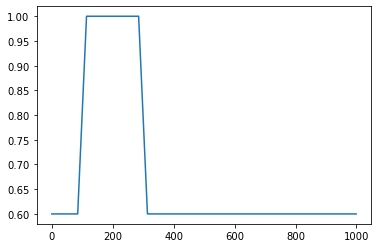

In [311]:
plt.plot(pulse)

In [312]:
pulse_fft = np.fft.rfft(pulse)

In [313]:
s_channel = np.zeros(len(pulse_fft))

In [314]:
pulse_fft_channel = np.copy(pulse_fft)
pulse_fft_channel[7:] = 0

In [315]:
pulse_ifft = np.fft.irfft(pulse_fft_channel)

Text(800, 1.0, 'Tap3')

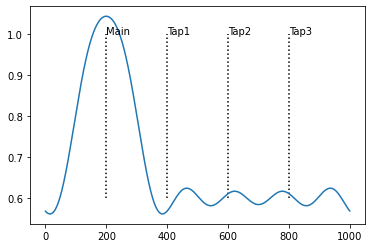

In [316]:
plt.plot(pulse_ifft)
plt.vlines([200, 400, 600, 800], vlow, vhigh, 'black', 'dotted')
plt.text(1 * ui, vhigh, "Main")
plt.text(2 * ui, vhigh, "Tap1")
plt.text(3 * ui, vhigh, "Tap2")
plt.text(4 * ui, vhigh, "Tap3")